# Use Crawl to collect url link in "即時看板"  
url: https://money.udn.com/money/index

In [1]:
# -*- coding: utf-8 -*-
import requests
from bs4 import BeautifulSoup
import re

new_list = []
url = 'https://money.udn.com/money/index'
response = requests.get(url)
response.encoding = 'utf-8'
soup = BeautifulSoup(response.text,"html.parser")
content = soup.find("div", id="tab1")
link = content.find_all("a")
for i in link:
    new_list.append("https://money.udn.com/"+i["href"])
    print("title:",i.text+"   link:" +" https://money.udn.com/"+i['href'])

title: 06:50會考6月5日公布成績 各縣市明星高中預估落點一次看   link: https://money.udn.com//money/story/12524/4570816
title: 06:49擔心就醫染病  4月門診量掉近500萬人次   link: https://money.udn.com//money/story/5648/4570685
title: 06:49陳菊宣布辭府秘書長 蔡英文分享合照：菊姐辛苦了   link: https://money.udn.com//money/story/7307/4570455
title: 06:49疫情衝擊醫院收入  掛號自費美食街收入銳減   link: https://money.udn.com//money/story/5648/4570695
title: 06:48今天開盤前 五件國際事不可不知   link: https://money.udn.com//money/story/5599/4571372
title: 06:00法國武漢肺炎疫情再添483死 累計2萬8108人不治   link: https://money.udn.com//money/story/5599/4571366
title: 05:39台灣能否參加WHA 法新社：譚德塞稱提案送交審議   link: https://money.udn.com//money/story/10511/4571365
title: 04:535月18日 五件財經大事搶先看   link: https://money.udn.com//money/story/5607/4571263
title: 02:36英國新冠肺炎疫情日增170死 近2個月來通報新低   link: https://money.udn.com//money/story/5599/4571336


# Save each new in a folder(including content and image)

In [4]:
from time import sleep
import os
from bs4 import BeautifulSoup
from urllib.request import urlretrieve

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

#for new_url in new_list:
    ## write your code here
for j in new_list:
    url = j
    response = requests.get(url)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, "html.parser")
    title = soup.find("h2", id="story_art_title").text
    content= soup.find("div", id="article_body")
    ss = content.find("div", class_="only_mobile")
    if not ss == None:
        ss.extract()
    print("new title: ",title)
    print("new content: ",content.text)
    import os
    dirname = os.path.join("./news-49/"+title)
    createFolder(dirname)
    #if not os.path.exists(dirname):
    #    os.makedirs(dirname)
    with open(dirname+"/content.txt", 'w', encoding="utf-8") as f:
        f.write(content.text)
    all_imgs = content.find_all("img")
    img=[]
    for i in all_imgs:
        img.append(i["src"])
        filename = i['src'].split('/')[-1]
        urlretrieve(i["src"], dirname+"/"+filename+".jpg") 
        print("save image:", end="\n")
        print(i["src"])


new title:  會考6月5日公布成績 各縣市明星高中預估落點一次看
new content:  
國中會考今天落幕，6月5日將寄發成績單。會考有多種計分方式，各縣市升學輔導專家和教師推估，基北區考生若要上建中、北一女，估計要達33.8分。台中一中、台中女中要95到96點；台南的台南一中要28點、台南女中26點。高雄部分，高雄中學落點約5A、30點，雄女為5A、28點。

至於各科錯幾題可拿A++，台北市補教表示今年取消英文聽力，配分全攤到閱讀測驗的英文競爭最激烈，錯一題已是極限。國文科標準也較往年提高，預估錯兩題才能拿A++；數學、自然、社會則與去年持平。

北市升學輔導專家、康橋國際學校課程總監卓意翔說，少子化下多所高中招生名額減少，但仍供多於求，今年若要上北市前四志願，測驗題至少30分以上，建中、北一女33.8分、作文五級分才算在安全範圍，師大附中落點估32.8分。前三志願外學校，作文非落點關鍵，中山女中、成功高中測驗題31分，松山高中30分；公立社區高中至少15分以上。

3.2萬人報考的中投區是全國最大考區，台中一中校長陳木柱說，若要上中一中、女中，五科都拿A是基本款，再看有幾個「＋」。計算方式是作文一級加一分、常態是五分。按往年模式保守估計，至少要有95到96點才有把握上榜。

高雄部分，補教老師李世揚表示高雄去年男女高分群從六比四改為七比三，估雄中落點5A、30點，雄女為5A、28點。今年數學和國文科稍難，推估國文程度好的考生在同分比序上略占優勢。

台南補教老師張簡永祥推估，若要上南一中，總分要98分，會考4A1B，不含作文的總積點約28點。南女總分也要98分，會考4A1B，不含作文總積點約26點。他表示台南今年刪除單項比序，且降低體適能比重，各考生「多元分數」幾乎都拿滿分，將由會考成績決定錄取與否。

武陵高中是桃園第一志願，該校教務主任謝文斌說，推估今年錄取成績應和往年差不多。考生要拿5A和七至八個「＋＋」 ，預估在32到33分，但真正錄取分數仍待選填志願放榜。國中會考落幕，6月5日將寄發成績單。升學專家預估，今年上建中、北一女至少要33.8分。記者林俊良／攝影facebook國中會考6月5日將寄發成績單，本報整理各縣市教師、升學專家推估明星高中落點。製表／潘乃欣facebook 
save image:
https://pgw.udn.c

# Jieba分詞

In [ ]:
!pip install jieba
!pip install matplotlib
!pip install wordcloud

In [2]:
import jieba
import jieba.analyse
for j in new_list:
    url = j
    response = requests.get(url)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, "html.parser")
    title = soup.find("h2", id="story_art_title").text
    content= soup.find("div", id="article_body")
    ss = content.find("div", class_="only_mobile")
    if not ss == None:
        ss.extract()
    print("new title: ",title)
    #print("new content: ",content.text)
    keywords = jieba.analyse.extract_tags(content.text, 5)
    print("關鍵詞", keywords)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Nick\AppData\Local\Temp\jieba.cache


new title:  會考6月5日公布成績 各縣市明星高中預估落點一次看


Loading model cost 1.391 seconds.
Prefix dict has been built successfully.


關鍵詞 ['推估', '5A', '高中', '台南', '專家']
new title:  擔心就醫染病  4月門診量掉近500萬人次
關鍵詞 ['人次', '減少', '醫院', '人數', '就醫']
new title:  陳菊宣布辭府秘書長 蔡英文分享合照：菊姐辛苦了
關鍵詞 ['蔡總統', '感謝', '秘書長', '臉書上', '合照']
new title:  疫情衝擊醫院收入  掛號自費美食街收入銳減
關鍵詞 ['醫院', '疫情', '健保', '減少', '美食街']
new title:  今天開盤前 五件國際事不可不知
關鍵詞 ['台積電', '指數', '晶片', '美國', '積電']
new title:  法國武漢肺炎疫情再添483死 累計2萬8108人不治
關鍵詞 ['通報', '483', '法國', '累計', '8108']
new title:  台灣能否參加WHA 法新社：譚德塞稱提案送交審議
關鍵詞 ['台灣', 'WHA', '議程', '問題', '總務委員會']
new title:  5月18日 五件財經大事搶先看
關鍵詞 ['...', 'more', '經濟', '疫情', '財經']
new title:  英國新冠肺炎疫情日增170死 近2個月來通報新低
關鍵詞 ['夏瑪', '英國', '冠狀', '24', '通報']


# Wordcloud  

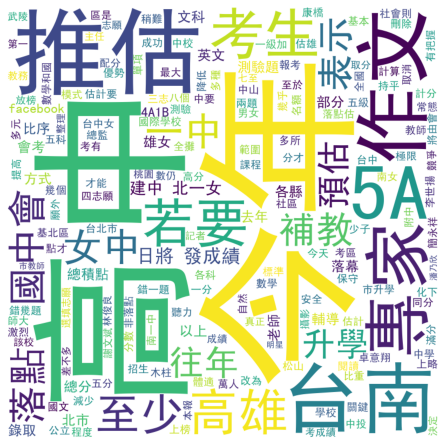

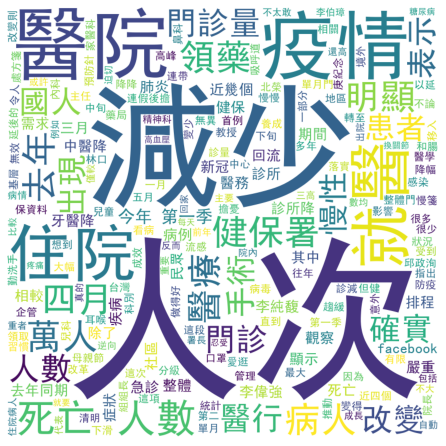

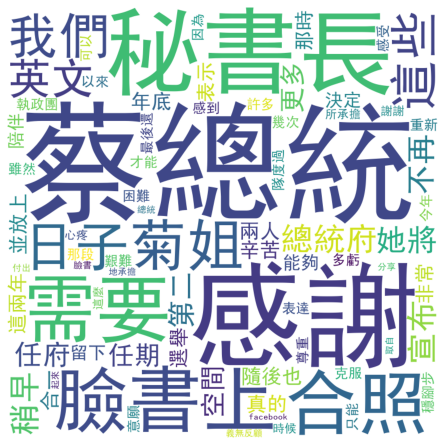

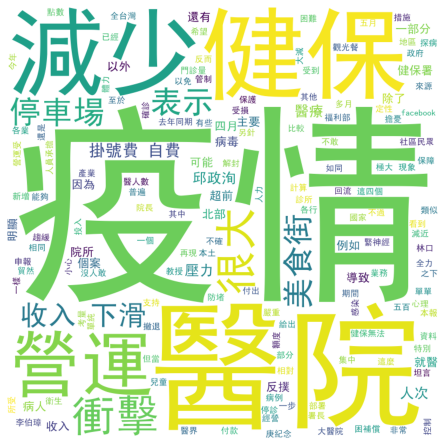

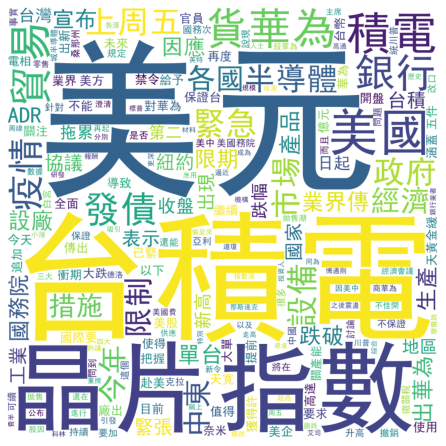

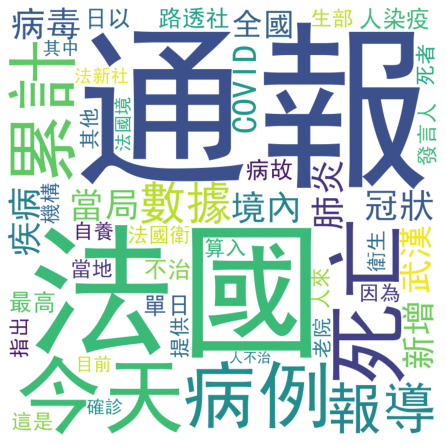

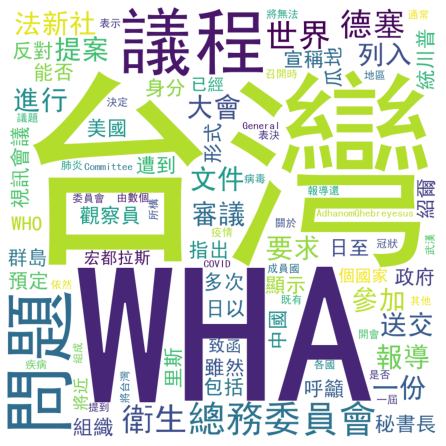

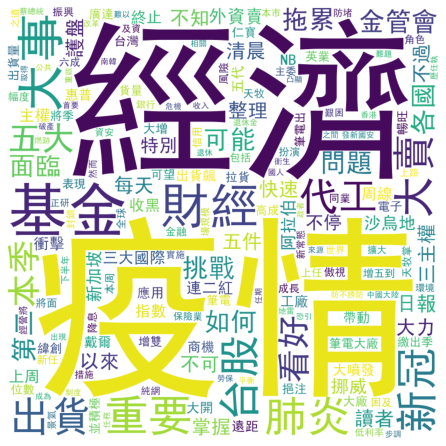

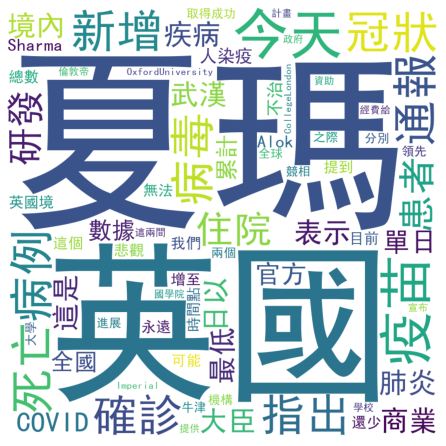

In [3]:
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
import jieba
import jieba.analyse
import matplotlib.pyplot as plt 
for j in new_list:
    url = j
    response = requests.get(url)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, "html.parser")
    title = soup.find("h2", id="story_art_title").text
    content= soup.find("div", id="article_body")
    ss = content.find("div", class_="only_mobile")
    if not ss == None:
        ss.extract()
    ret = content.text.replace('--', '')
    word = jieba.cut(ret, cut_all=False)
    word = " ".join(word)   
    stopwords = set(STOPWORDS) 

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', font_path='simhei.ttf',
                    stopwords = stopwords,
                    min_font_size = 10).generate(word) 

    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()